Import basic libraries for EDA 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We create the three DataSets that we will be exploring.

In [4]:
steam = pd.read_csv('./data/steam.csv')
items = pd.read_parquet('./data/items.parquet')
review = pd.read_parquet('./data/review.parquet')

We start the EDA process by checking what our `Steam` dataset is made of.

In [128]:
steam.head(3)

,genres,title,release_date,tags,price,id,developer
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.99,761140,Kotoshiro
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",0.00,643980,Secret Level SRL
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",0.00,670290,Poolians.com


#### Check if there are any outliers in the price column.

#### We use the Interquartile range (IQR) which is used to describe the dispersion of a DataSet.
#### IQR = Q3 - Q1, which represents roughly 50% of the data.

In [42]:
standardDeviation = np.std(steam['price'])
meanPrice = np.mean(steam['price'])
print(f"Standar Deviation[σ]: {standardDeviation:.2f}\nMean Price: {meanPrice:.2f}")

Standar Deviation[σ]: 15.66
Mean Price: 8.48


In [55]:
prices = steam['price'].sort_values(ascending = True)
Q1 = np.percentile(prices, 25)
Q3 = np.percentile(prices, 75)
IQR = Q3 - Q1
print(f"First Quartile: {Q1}\nThird Quartile: {Q3}\nIQR: {IQR}")

First Quartile: 1.99
Third Quartile: 9.99
IQR: 8.0


Now that we have the first and third quartile, we can calculate the values that are out of bounds.

In [57]:
minimum = Q1 - 1.5 * IQR
maximum = Q3 + 1.5 * IQR
print(f"Minimum: {minimum:.2f}\nMaximum: {maximum:.2f}")

Minimum: -10.01
Maximum: 21.99


In [62]:
minOutlier = steam[steam['price'] < Q1]
maxOutlier = steam[steam['price'] > Q3]

(0.0, 30.0)

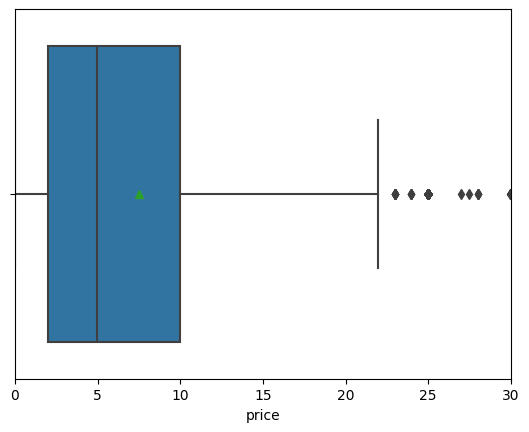

In [129]:
sns.boxplot(x = 'price' , orient = 'h', data = steam[steam['price'] < 50], showmeans = True)
plt.xlim(0,30)

#### We can see that most games are cheaper than $10.

Now we create a boxplot so that we can understand these values.